# including necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Reading data in python environment

In [5]:
data = pd.read_excel('iris.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Checking for null values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Checking basic statistics details

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualising the null values

<AxesSubplot:>

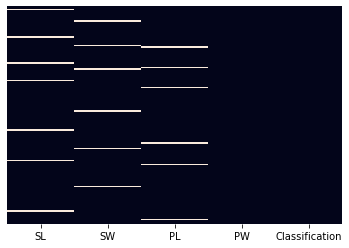

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

# Filling the null values columns with mode value ie most frequently occuring value and checking the null values again

In [10]:
data['SL']=data['SL'].fillna(data['SL'].mode()[0])
data['SW']=data['SW'].fillna(data['SW'].mode()[0])
data['PL']=data['PL'].fillna(data['PL'].mode()[0])

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# plotting  boxplot for visualising the outliers

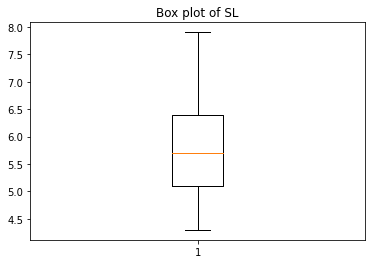

In [12]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')
plt.show()

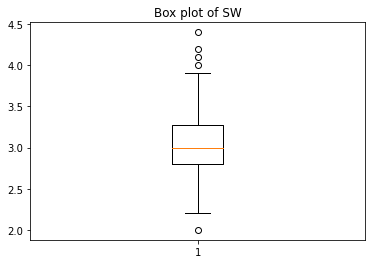

In [13]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')
plt.show()

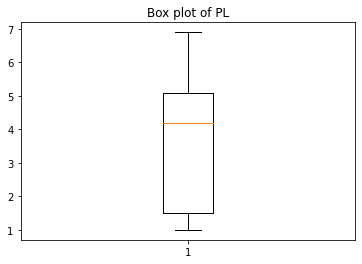

In [17]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')
plt.show()

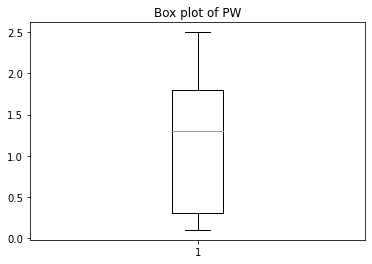

In [16]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')
plt.show()

# Removing outliers from column SW

In [18]:
tdata=data

In [19]:
Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data['SW']=np.where(data['SW']>upper_limit,upper_limit,np.where(data['SW']<lower_limit,lower_limit,data['SW']))

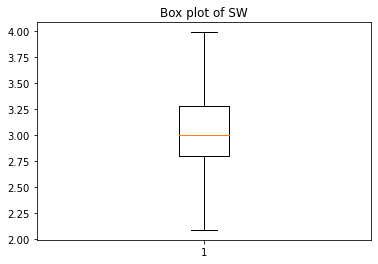

In [20]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')
plt.show()

In [25]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# splitting the data set and applying decision tree classifier

In [28]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']
print(X.head())
print(y.head())

    SL   SW   PL   PW
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  5.0  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Classification, dtype: object


In [29]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

# The above code will create the empty model. Inorder to provide the operations to the model we should train them.We can train the model with fit function.And printing the accuracy score

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.5)
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9333333333333333


# So the accuracy is 93% for decision tree

# We can also use KNeighborsClassifier(efficiency is higher)

In [33]:
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()

# # The above code will create the empty model. Inorder to provide the operations to the model we should train them.We can train the model with fit function.And printing the accuracy score

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.5)
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9466666666666667


# So the accuracy is 94.6% for KNeighbors

# Importing required libraries and defining random forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier 
clfr= RandomForestClassifier(random_state = 100)

# Performing training 

clfr.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

# making predictions 

In [39]:
Y_pred=clfr.predict(x_test)

Y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
  

# checking the accuracy and printing the confusion matrix ,accuracy is 94.6%

In [43]:
from sklearn.metrics import confusion_matrix,precision_score
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

cm=np.array(confusion_matrix(y_test,Y_pred))

cm

Accuracy: 0.9466666666666667


array([[23,  0,  0],
       [ 0, 27,  1],
       [ 0,  3, 21]], dtype=int64)

# making prediction on new data 

In [44]:
clfr.predict([[3, 5, 4, 2]])

array(['Iris-virginica'], dtype=object)

# Conclusion: KNeighbors and random forest classifer gives the best result based on accuracy score